In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Зашумить изображение при помощи шума гаусса

In [61]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
original_image = image_gray.copy()

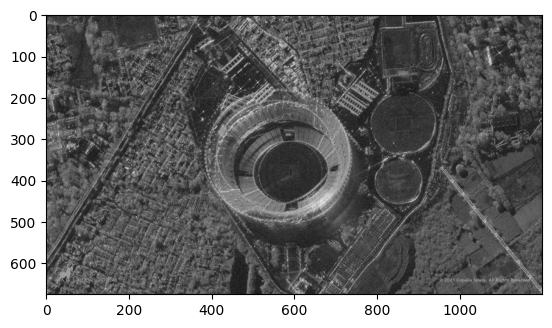

In [62]:
plt.imshow(image_gray, cmap="gray")

In [63]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[ 96,  23, 119, ...,   0,  18,   0],
       [  0,   5,   0, ...,  13,   0,   0],
       [ 87,  45, 208, ...,  76,  29,  87],
       ...,
       [  0, 114,   0, ..., 143,  36,   0],
       [ 32,   0,   0, ...,  73,   5,   0],
       [151,   0,  36, ...,   0,   0,  40]],
      shape=(675, 1200), dtype=uint8)

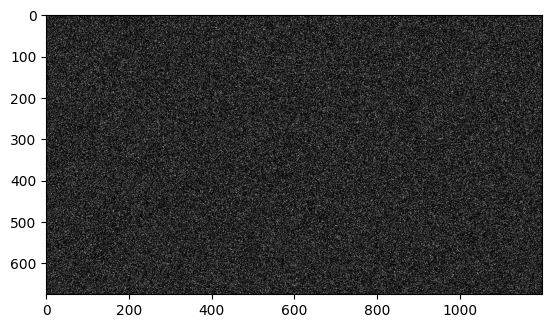

In [64]:
plt.imshow(noise_gauss, cmap="gray")

# Зашумить изображение при помощи постоянного шума.

In [65]:
noise_strength = 160
noise = np.random.uniform(-noise_strength, noise_strength, image_gray.shape)
noisy_image_weak = image_gray + noise
noisy_image_weak = np.clip(noisy_image_weak, 0, 255).astype(np.uint8)

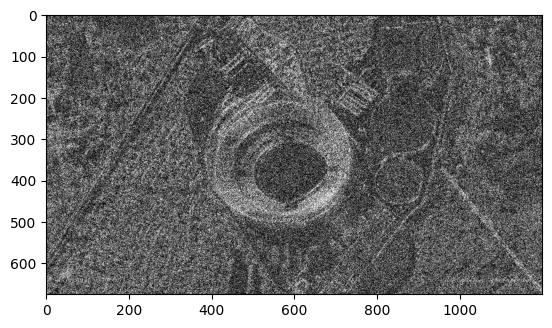

In [66]:
plt.imshow(noisy_image_weak, cmap='gray')

# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [67]:
def show(image, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.imshow(noisy_image_weak, cmap='gray')
    plt.title('Постоянный шум')
    plt.subplot(1,2,2)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()
from skimage.metrics import mean_squared_error, structural_similarity
def calculate_metrics(original, processed):
    mse = mean_squared_error(original, processed)
    ssim = structural_similarity(original, processed, data_range=255)
    return mse, ssim
results = {}

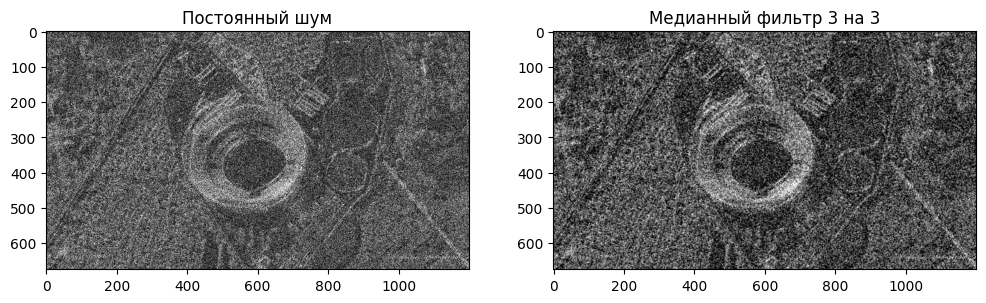

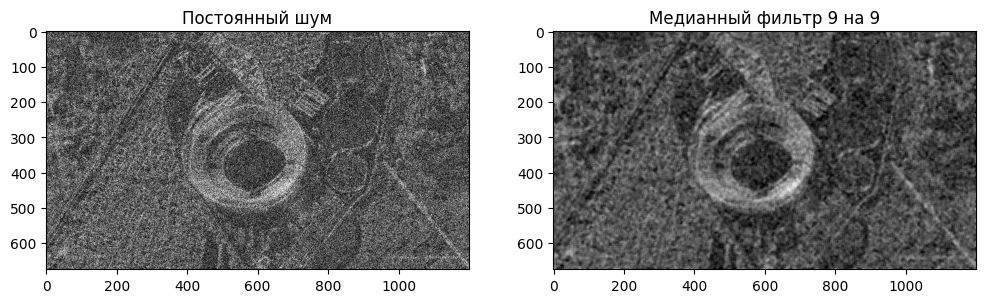

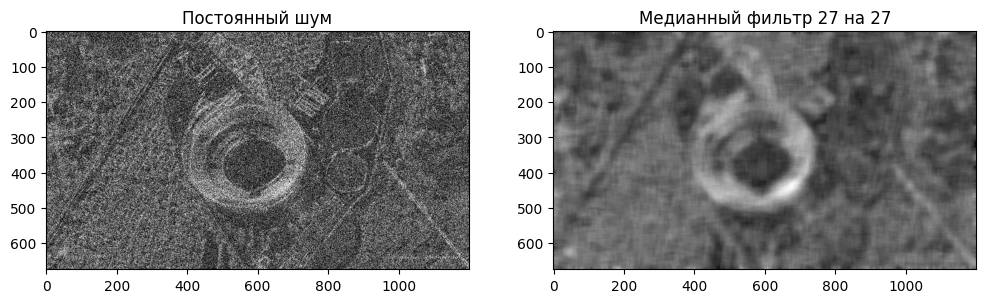

In [68]:
image_median = cv2.medianBlur(noisy_image_weak, 3)
mse, ssim = calculate_metrics(original_image, image_median)
results['Медианный3'] = {'mse': mse, 'ssim': ssim}
show(image_median, 'Медианный фильтр 3 на 3')

image_median = cv2.medianBlur(noisy_image_weak, 9)
mse, ssim = calculate_metrics(original_image, image_median)
results['Медианный9'] = {'mse': mse, 'ssim': ssim}
show(image_median, 'Медианный фильтр 9 на 9')

image_median = cv2.medianBlur(noisy_image_weak, 27)
mse, ssim = calculate_metrics(original_image, image_median)
results['Медианный27'] = {'mse': mse, 'ssim': ssim}
show(image_median, 'Медианный фильтр 27 на 27')

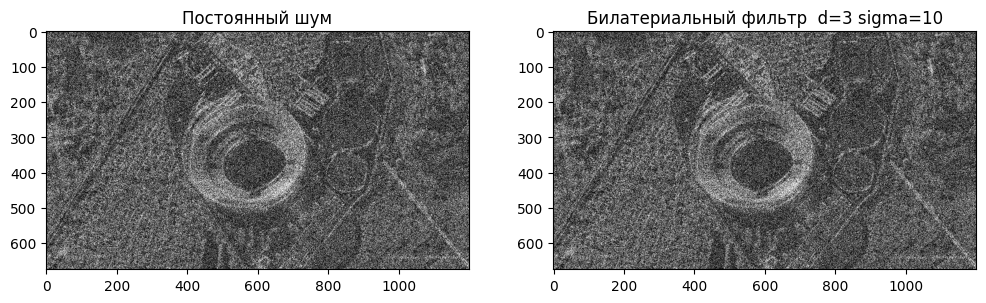

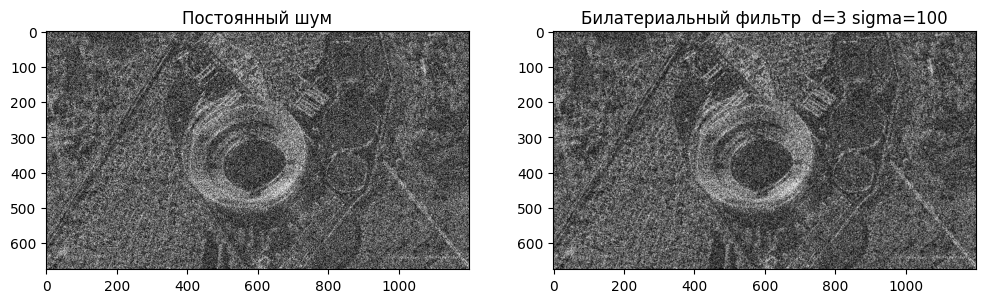

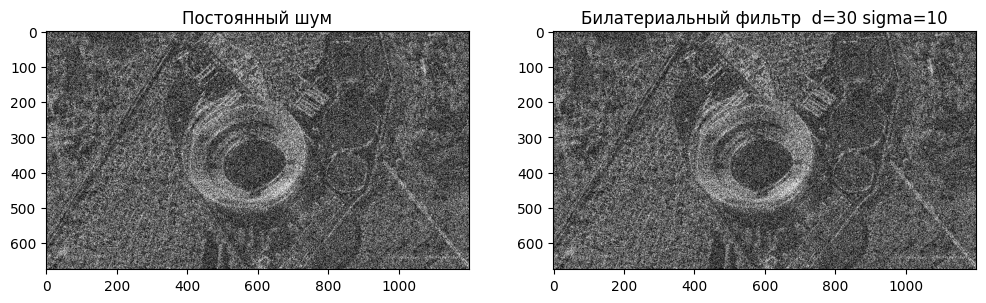

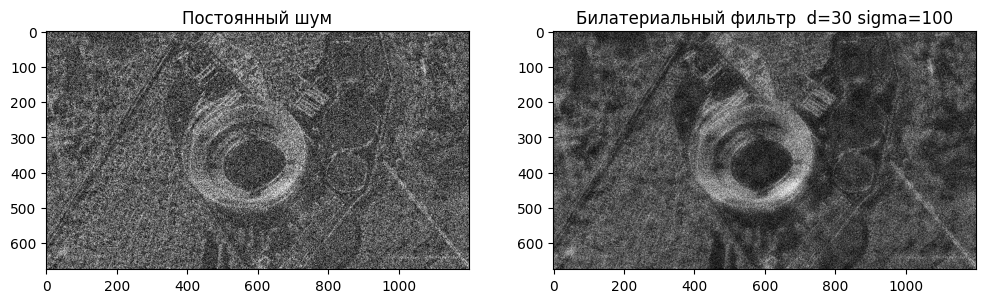

In [69]:
image_bilat = cv2.bilateralFilter(noisy_image_weak,3,10,10)
mse, ssim = calculate_metrics(original_image, image_bilat)
results['Билатеральный d=3 σ=10'] = {'mse': mse, 'ssim': ssim}
show(image_bilat, 'Билатериальный фильтр  d=3 sigma=10')

image_bilat = cv2.bilateralFilter(noisy_image_weak,3,100,100)
mse, ssim = calculate_metrics(original_image, image_bilat)
results['Билатеральный d=3 σ=100'] = {'mse': mse, 'ssim': ssim}
show(image_bilat, 'Билатериальный фильтр  d=3 sigma=100')

image_bilat = cv2.bilateralFilter(noisy_image_weak,30,10,10)
mse, ssim = calculate_metrics(original_image, image_bilat)
results['Билатеральный d=30 σ=10'] = {'mse': mse, 'ssim': ssim}
show(image_bilat, 'Билатериальный фильтр  d=30 sigma=10')

image_bilat = cv2.bilateralFilter(noisy_image_weak,30,100,100)
mse, ssim = calculate_metrics(original_image, image_bilat)
results['Билатеральный d=30 σ=100'] = {'mse': mse, 'ssim': ssim}
show(image_bilat, 'Билатериальный фильтр  d=30 sigma=100')

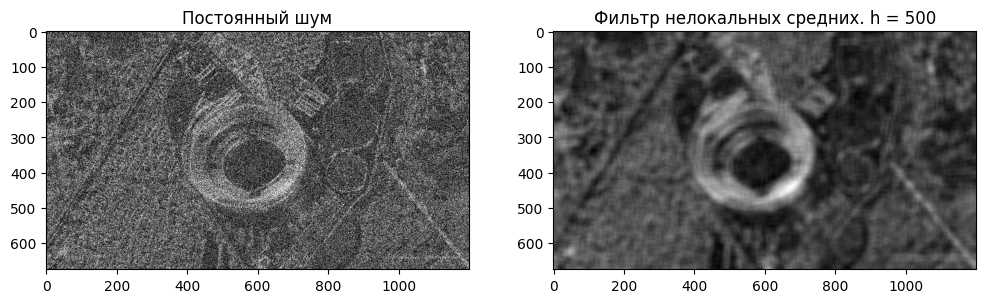

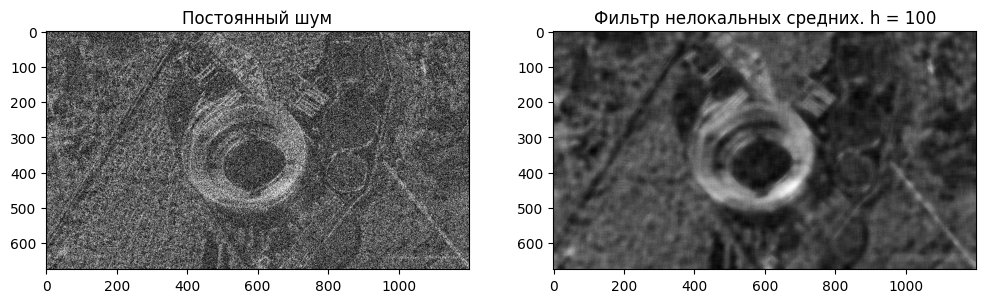

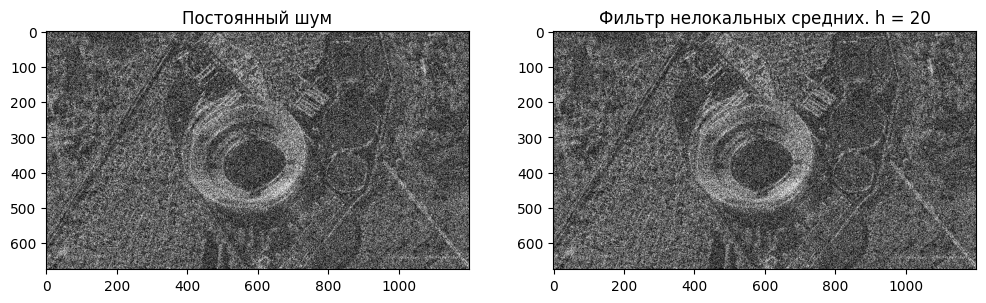

In [70]:
im1 = cv2.fastNlMeansDenoising(noisy_image_weak, None, 500)
mse, ssim = calculate_metrics(original_image, im1)
results['Нелокальные средние h=500'] = {'mse': mse, 'ssim': ssim}
show(im1, 'Фильтр нелокальных средних. h = 500')

im1 = cv2.fastNlMeansDenoising(noisy_image_weak, None, 100)
mse, ssim = calculate_metrics(original_image, im1)
results['Нелокальные средние h=100'] = {'mse': mse, 'ssim': ssim}
show(im1, 'Фильтр нелокальных средних. h = 100')

im1 = cv2.fastNlMeansDenoising(noisy_image_weak, None, 20)
mse, ssim = calculate_metrics(original_image, im1)
results['Нелокальные средние h=20'] = {'mse': mse, 'ssim': ssim}
show(im1, 'Фильтр нелокальных средних. h = 20')

In [71]:
print("\nРЕЗУЛЬТАТЫ:\n")
best_mse = float('inf')
best_ssim = -float('inf')
best_filter_mse = None
best_filter_ssim = None

for name, metrics in results.items():
    mse, ssim = metrics['mse'], metrics['ssim']
    print(f"{name:25} | MSE: {mse:7.2f} | SSIM: {ssim:.4f}")
    
    if mse < best_mse:
        best_mse = mse
        best_filter_mse = name
    if ssim > best_ssim:
        best_ssim = ssim
        best_filter_ssim = name
print(f"Лучший фильтр по MSE:  {best_filter_mse} (MSE = {best_mse:.2f})")
print(f"Лучший фильтр по SSIM: {best_filter_ssim} (SSIM = {best_ssim:.4f})")


РЕЗУЛЬТАТЫ:

Медианный3                | MSE: 2174.04 | SSIM: 0.1708
Медианный9                | MSE:  626.88 | SSIM: 0.2724
Медианный27               | MSE:  591.66 | SSIM: 0.2399
Билатеральный d=3 σ=10    | MSE: 6134.69 | SSIM: 0.0854
Билатеральный d=3 σ=100   | MSE: 2785.80 | SSIM: 0.1544
Билатеральный d=30 σ=10   | MSE: 6118.17 | SSIM: 0.0848
Билатеральный d=30 σ=100  | MSE: 1665.50 | SSIM: 0.1586
Нелокальные средние h=500 | MSE:  689.73 | SSIM: 0.2471
Нелокальные средние h=100 | MSE:  635.94 | SSIM: 0.2828
Нелокальные средние h=20  | MSE: 6162.35 | SSIM: 0.0852
Лучший фильтр по MSE:  Медианный27 (MSE = 591.66)
Лучший фильтр по SSIM: Нелокальные средние h=100 (SSIM = 0.2828)
